In this notebook, we shall explore using modified duration and convexity to estimate bond price movements due to changes in the bond yield.

For the sake of simplicity, let us assume that bond yields follow continuous compounding (you can follow the same steps to work out the actual case where bond yields follow discrete compounding). The bond price formula is given by:
  \begin{equation*}
    \begin{split}
      B(y) = \sum_{i=1}^n c_i e^{-y t_i},
    \end{split}
  \end{equation*}
and its $1^{st}$- and $2^{nd}$-order derivatives are given by:
  \begin{equation*}
    \begin{split}
      \frac{\partial B}{\partial y}=-\sum_{i=1}^nt_ic_ie^{-yt_i}, \hspace{1cm} \mbox{ and } \hspace{1cm} \frac{\partial^2 B}{\partial y^2}=\sum_{i=1}^n t_i^2 c_i e^{-y t_i}.
    \end{split}
  \end{equation*}

The bond's modified duration is there:
\begin{equation*}
  \begin{split}
    D = \frac{1}{B} \sum_{i=1}^n t_ic_ie^{-yt_i},
  \end{split}
\end{equation*}
while its convexity can be written as:
\begin{equation*}
  \begin{split}
    C = \frac{1}{B} \sum_{i=1}^n t_i^2 c_i e^{-y t_i}.
  \end{split}
\end{equation*}

Under $1^{st}$-order approximation, we only rely on the bond's modified duration to estimate its price change due to yield movements:
\begin{equation*}
  \begin{split}
    \frac{\Delta B}{B} &\approx -D \Delta y \\
    \frac{B(y+\Delta y) - B(y)}{B(y)} &\approx -D \Delta y \\
    B(y+\Delta y) - B(y) &\approx -D \Delta y B(y) \\
    B(y+\Delta y) &\approx B(y)  - D \Delta y B(y). \;\;\;\lhd
  \end{split}
\end{equation*}
Under $2^{nd}$-order approximation, we use both modified duration and convexity to estimate bond price changes:
\begin{equation*}
  \begin{split}
    \frac{\Delta B}{B} &\approx -D \Delta y + \frac{1}{2} C \cdot (\Delta y)^2 \\
    \frac{B(y+\Delta y) - B(y)}{B(y)} &\approx -D \Delta y + \frac{1}{2} C \cdot (\Delta y)^2 \\
    B(y+\Delta y) - B(y) &\approx -D \Delta y B(y) + \frac{1}{2} C \cdot (\Delta y)^2 B(y) \\
    B(y+\Delta y) &\approx B(y)  -D \Delta y B(y) + \frac{1}{2} C \cdot (\Delta y)^2 B(y). \;\;\;\lhd
  \end{split}
\end{equation*}

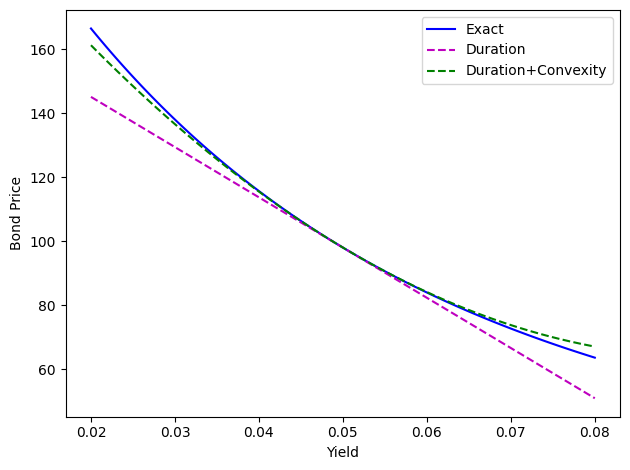

In [1]:
import numpy as np
import matplotlib.pylab as plt


def Bond(y, n, c):
    npv = 0.0
    for i in np.arange(1, n+1):
        npv += c * np.exp(-y*i)

    npv += 100 * np.exp(-y*i)
    return npv


def Duration(y, n, c, B):
    npv = 0.0
    for i in np.arange(1, n+1):
        npv += i * c * np.exp(-y*i)

    npv += n * 100 * np.exp(-y*n)
    npv /= B
    return npv


def Convexity(y, n, c, B):
    npv = 0.0
    for i in np.arange(1, n+1):
        npv += i**2 * c * np.exp(-y*i)

    npv += n**2 * 100 * np.exp(-y*n)
    npv /= B
    return npv


n = 30
current_yield = 0.05

plt.figure(tight_layout=True)
yy = np.linspace(0.02, 0.08, 100)
BB = [Bond(y, n, 5) for y in yy]
dur = Duration(current_yield, n, 5, Bond(current_yield, n, 5))
con = Convexity(current_yield, n, 5, Bond(current_yield, n, 5))
BB_est1 = Bond(current_yield, n, 5) + Bond(current_yield, n, 5)*(-dur*(yy - current_yield))
BB_est2 = Bond(current_yield, n, 5) + Bond(current_yield, n, 5)*(-dur*(yy - current_yield) +
                                                                 0.5 * con * (yy - current_yield)**2)
plt.plot(yy, BB, 'b-', label='Exact')
plt.plot(yy, BB_est1, 'm--', label='Duration')
plt.plot(yy, BB_est2, 'g--', label='Duration+Convexity')
plt.xlabel('Yield')
plt.ylabel('Bond Price')
plt.legend()
plt.show()
